In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.cm
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns
from sklearn import cluster
import numpy as np

In [2]:
# Objective:
#Trend of gas and electricity consumption
# predict the gas consumption till 2030 and check whether it meets the dutch target
# can we meet the reduction 95% of the gas emission

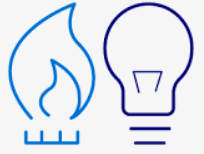

# Load  data

In [3]:
data1=pd.read_csv('./archive-1/Gas/liander_gas_01012010.csv')
data2=pd.read_csv('./archive-1/Gas/liander_gas_01012011.csv')
data3=pd.read_csv('./archive-1/Gas/liander_gas_01012012.csv')
data4=pd.read_csv('./archive-1/Gas/liander_gas_01012013.csv')
data5=pd.read_csv('./archive-1/Gas/liander_gas_01012014.csv')
data6=pd.read_csv('./archive-1/Gas/liander_gas_01012015.csv')
data7=pd.read_csv('./archive-1/Gas/liander_gas_01012016.csv')
data8=pd.read_csv('./archive-1/Gas/liander_gas_01012017.csv')
data9=pd.read_csv('./archive-1/Gas/liander_gas_01012018.csv')
data10=pd.read_csv('./archive-1/Gas/liander_gas_01012019.csv')
data11=pd.read_csv('./archive-1/Gas/liander_gas_01012020.csv')

In [4]:
elec1=pd.read_csv('./archive-1/Electricity/liander_electricity_01012010.csv')
elec2=pd.read_csv('./archive-1/Electricity/liander_electricity_01012011.csv')
elec3=pd.read_csv('./archive-1/Electricity/liander_electricity_01012012.csv')
elec4=pd.read_csv('./archive-1/Electricity/liander_electricity_01012013.csv')
elec5=pd.read_csv('./archive-1/Electricity/liander_electricity_01012014.csv')
elec6=pd.read_csv('./archive-1/Electricity/liander_electricity_01012015.csv')
elec7=pd.read_csv('./archive-1/Electricity/liander_electricity_01012016.csv')
elec8=pd.read_csv('./archive-1/Electricity/liander_electricity_01012017.csv')
elec9=pd.read_csv('./archive-1/Electricity/liander_electricity_01012018.csv')
elec10=pd.read_csv('./archive-1/Electricity/liander_electricity_01012019.csv')
elec11=pd.read_csv('./archive-1/Electricity/liander_electricity_01012020.csv')

In [5]:
data1.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,21,100.0,85.71,43,G4,6728,0.0,0.0
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AH,AMSTERDAM,35,100.0,91.43,89,G4,1822,0.0,0.0
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,60,G4,1556,0.0,0.0
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,25,100.0,96.00,88,G4,2006,0.0,0.0
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AP,1011AP,AMSTERDAM,18,100.0,100.00,89,G4,2774,0.0,0.0


In [6]:
data1.shape

(101398, 14)

# Exploratory data analysis

In [7]:
data1['Year']=2010
data2['Year']=2011
data3['Year']=2012
data4['Year']=2013
data5['Year']=2014
data6['Year']=2015
data7['Year']=2016
data8['Year']=2017
data9['Year']=2018
data10['Year']=2019
data11['Year']=2020

In [8]:
gas=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data8,data9,data10,data11],axis=0)

In [9]:
# Add country in my data for future tableau presentation
# add and delete some columns for better understanding of the data

In [10]:
gas['Country']='Netherlands'

In [11]:
gas['number_active_conn'] = gas['perc_of_active_connections']*gas['num_connections']/100
gas['low_tarif_cons'] = gas['annual_consume'] * gas['annual_consume_lowtarif_perc']/100
gas['num_smartmeters'] = gas['num_connections'] * gas['smartmeter_perc'] / 100
gas['delivery_unit']= gas['annual_consume']*(100-gas['delivery_perc'])/100

In [12]:
gas=gas.drop(['net_manager','purchase_area','perc_of_active_connections','num_connections','annual_consume_lowtarif_perc','smartmeter_perc','delivery_perc'], axis=1)

In [13]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336536 entries, 0 to 119032
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   street              1336536 non-null  object 
 1   zipcode_from        1336536 non-null  object 
 2   zipcode_to          1336536 non-null  object 
 3   city                1336536 non-null  object 
 4   type_conn_perc      1336536 non-null  float64
 5   type_of_connection  1336536 non-null  object 
 6   annual_consume      1336536 non-null  float64
 7   Year                1336536 non-null  int64  
 8   Country             1336536 non-null  object 
 9   number_active_conn  1336536 non-null  float64
 10  low_tarif_cons      1336536 non-null  float64
 11  num_smartmeters     1336536 non-null  float64
 12  delivery_unit       1336536 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 142.8+ MB


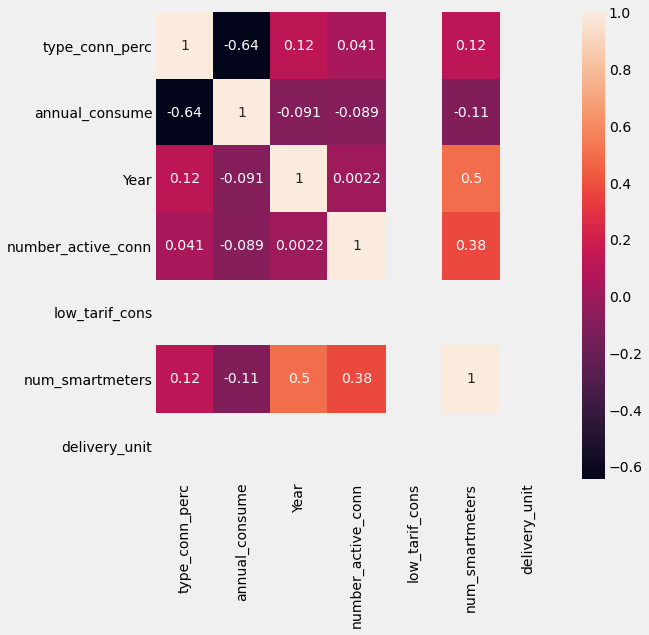

In [14]:
corr_matrix=gas.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
#still low tarif coception is low correlated to all other features so i'll drop the column from the data set.
gas=gas.drop(['low_tarif_cons'], axis=1)

In [16]:
gas[(gas['street']=='Laan van Westenenk')]

,street,zipcode_from,zipcode_to,city,type_conn_perc,type_of_connection,annual_consume,Year,Country,number_active_conn,num_smartmeters,delivery_unit
93552,Laan van Westenenk,7336AV,7336AZ,APELDOORN,27.00,G25,12438.0,2010,Netherlands,24.0006,0.0000,0.0
96590,Laan van Westenenk,7336AV,7336AZ,APELDOORN,27.00,G25,11631.0,2011,Netherlands,24.0006,0.0000,0.0
96978,Laan van Westenenk,7336AV,7336AZ,APELDOORN,31.00,G4,10922.0,2012,Netherlands,24.0006,0.0000,0.0
97326,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,10631.0,2013,Netherlands,23.9988,0.0000,0.0
97634,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,10780.0,2014,Netherlands,26.0008,0.9996,0.0
97951,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,9979.0,2015,Netherlands,26.0008,0.9996,0.0
98353,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,10026.0,2016,Netherlands,26.0008,0.9996,0.0
98751,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,9581.0,2017,Netherlands,26.0008,1.9992,0.0
98751,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,9581.0,2017,Netherlands,26.0008,1.9992,0.0
99148,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.00,G25,9788.0,2018,Netherlands,26.0008,1.9992,0.0


In [17]:
gas=gas.drop_duplicates()

In [18]:
gas

,street,zipcode_from,zipcode_to,city,type_conn_perc,type_of_connection,annual_consume,Year,Country,number_active_conn,num_smartmeters,delivery_unit
0,De Ruyterkade,1011AC,1011AC,AMSTERDAM,43.00,G4,6728.0,2010,Netherlands,17.9991,0.0000,0.0
1,Oosterdokskade,1011AD,1011AH,AMSTERDAM,89.00,G4,1822.0,2010,Netherlands,32.0005,0.0000,0.0
2,Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,60.00,G4,1556.0,2010,Netherlands,13.9995,0.0000,0.0
3,Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,88.00,G4,2006.0,2010,Netherlands,24.0000,0.0000,0.0
4,Prins Hendrikkade,1011AP,1011AP,AMSTERDAM,89.00,G4,2774.0,2010,Netherlands,18.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119028,Tolheksleane,9249NT,9249NT,FRIESCHEPALEN,100.00,G4,1578.0,2020,Netherlands,15.0000,13.9995,0.0
119029,Tolheksleane,9249NV,9249NV,FRIESCHEPALEN,100.00,G4,2108.0,2020,Netherlands,18.0000,14.0004,0.0
119030,'t Tolhek,9249NW,9249NW,FRIESCHEPALEN,81.82,G4,2887.0,2020,Netherlands,11.0000,10.0001,0.0
119031,Lytse Leane,9249NX,9249NX,FRIESCHEPALEN,100.00,G4,1530.0,2020,Netherlands,39.0000,33.0018,0.0


In [19]:
elec1['Year']=2010
elec2['Year']=2011
elec3['Year']=2012
elec4['Year']=2013
elec5['Year']=2014
elec6['Year']=2015
elec7['Year']=2016
elec8['Year']=2017
elec9['Year']=2018
elec10['Year']=2019
elec11['Year']=2020

In [20]:
Elec=pd.concat([elec1,elec2,elec3,elec4,elec5,elec6,elec7,elec8,elec9,elec10,elec11], axis=0)

In [21]:
Elec['number_active_conn'] = Elec['perc_of_active_connections']*Elec['num_connections']/100
Elec['low_tarif_cons'] = Elec['annual_consume'] * Elec['annual_consume_lowtarif_perc']/100
Elec['num_smartmeters'] = Elec['num_connections'] * Elec['smartmeter_perc']/100
Elec['delivery_unit']= Elec['annual_consume']*(100-Elec['delivery_perc'])/100

In [22]:
Elec=Elec.drop(['net_manager','purchase_area','perc_of_active_connections','num_connections','annual_consume_lowtarif_perc','smartmeter_perc','delivery_perc'], axis=1)

In [23]:
Elec['Country']='Netherlands'

In [24]:
Elec['delivery_unit'].sum()

295166495.0826

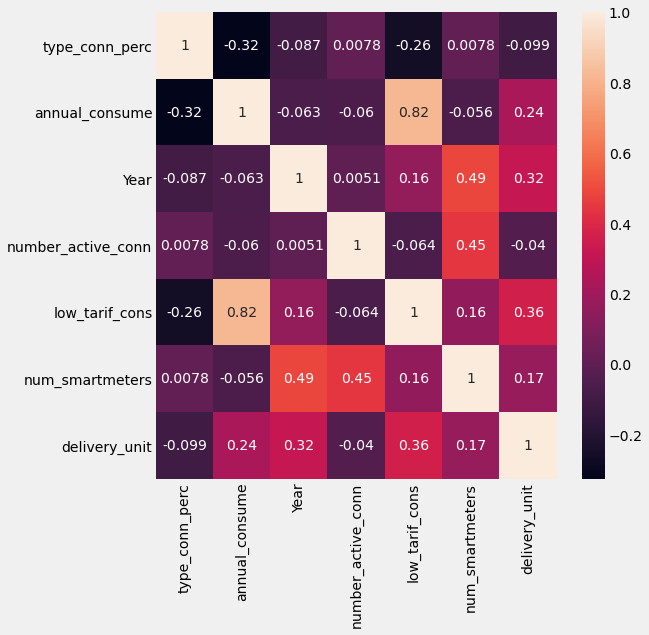

In [25]:
corr_matrix=Elec.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
# low_tarif_cons and annual_consume(Target variable) are highly correlated so drop low_tarif _cons from the data.
Elec=Elec.drop(['low_tarif_cons'], axis=1)

In [27]:
Elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522526 entries, 0 to 143885
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   street              1522526 non-null  object 
 1   zipcode_from        1522526 non-null  object 
 2   zipcode_to          1522526 non-null  object 
 3   city                1522526 non-null  object 
 4   type_conn_perc      1522526 non-null  float64
 5   type_of_connection  1522526 non-null  object 
 6   annual_consume      1522526 non-null  float64
 7   Year                1522526 non-null  int64  
 8   number_active_conn  1522526 non-null  float64
 9   num_smartmeters     1522526 non-null  float64
 10  delivery_unit       1522526 non-null  float64
 11  Country             1522526 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 151.0+ MB


In [28]:
# Iam going to see which city has high gas consumption based on year?
# I want to cluster based on the top gas consumption cities

In [29]:
topcities_gas_consume= gas.groupby(gas['city']).agg({'annual_consume':'sum'}).annual_consume.nlargest(5)

In [30]:
topcities_gas_consume

city
AMSTERDAM    218533102.0
HAARLEM       63120739.0
NIJMEGEN      58980744.0
ARNHEM        56955849.0
APELDOORN     56567108.0
Name: annual_consume, dtype: float64

In [31]:
# Amsterdam has highy gas consumption city to conside five top cities
# Amsterdam consumption rate is more than 3times higher than other cities.
# reason:May be population of the city (capital of Netherlands)

In [32]:
# Exploring with top 5 cities.

In [33]:
df2=gas[(gas['city'] =='AMSTERDAM') | 
        (gas['city']=='HAARLEM') | (gas['city']=='NIJMEGEN') | 
        (gas['city']== 'ARNHEM') | (gas['city']=='APELDOORN')]

In [34]:
df2

,street,zipcode_from,zipcode_to,city,type_conn_perc,type_of_connection,annual_consume,Year,Country,number_active_conn,num_smartmeters,delivery_unit
0,De Ruyterkade,1011AC,1011AC,AMSTERDAM,43.00,G4,6728.0,2010,Netherlands,17.9991,0.0000,0.0
1,Oosterdokskade,1011AD,1011AH,AMSTERDAM,89.00,G4,1822.0,2010,Netherlands,32.0005,0.0000,0.0
2,Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,60.00,G4,1556.0,2010,Netherlands,13.9995,0.0000,0.0
3,Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,88.00,G4,2006.0,2010,Netherlands,24.0000,0.0000,0.0
4,Prins Hendrikkade,1011AP,1011AP,AMSTERDAM,89.00,G4,2774.0,2010,Netherlands,18.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99845,Europaweg,7336AP,7336AR,APELDOORN,30.77,G4,11835.0,2020,Netherlands,24.0006,6.0008,0.0
99846,Schumanpark,7336AS,7336AS,APELDOORN,70.59,G4,5297.0,2020,Netherlands,17.0000,0.9996,0.0
99847,Dijkgraafweg,7336AT,7336AT,APELDOORN,35.71,G4,3469.0,2020,Netherlands,14.0000,3.0002,0.0
99848,Laan van Westenenk,7336AV,7336AZ,APELDOORN,32.14,G4,9606.0,2020,Netherlands,26.0008,6.0004,0.0


In [35]:
# I want to know in every year how much gas each of thse cities consume and how many active connections are in thses cities.

In [36]:
gas_consume = (pd.pivot_table(df2, values=['annual_consume', 'number_active_conn'], index=['city', 'Year'],
                    aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum}).rename_axis(None,axis=1).reset_index())

In [37]:
gas_consume

,city,Year,annual_consume,number_active_conn
0,AMSTERDAM,2010,20703727.0,348196.9785
1,AMSTERDAM,2011,20513470.0,348568.0017
2,AMSTERDAM,2012,20086633.0,349248.0549
3,AMSTERDAM,2013,19726875.0,349580.1518
4,AMSTERDAM,2014,19608792.0,349757.1575
5,AMSTERDAM,2015,19042749.0,350515.0908
6,AMSTERDAM,2016,19689961.0,371268.1087
7,AMSTERDAM,2017,19840825.0,378433.1432
8,AMSTERDAM,2018,19866854.0,379546.0165
9,AMSTERDAM,2019,19753536.0,379297.1596


In [38]:
df4=gas[(gas['city'] =='AMSTERDAM')]
df5=gas[(gas['city'] =='APELDOORN')]
df6=gas[(gas['city'] =='ARNHEM')]
df7=gas[(gas['city'] =='HAARLEM')]
df8=gas[(gas['city'] =='NIJMEGEN')]

In [39]:
a=df4[(df4['Year']==2017)]

In [40]:
a['number_active_conn'].sum()

378433.1432

In [41]:
a['annual_consume'].sum()

19840825.0

In [42]:
gas_ams =  pd.pivot_table(df4, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
gas_app =  pd.pivot_table(df5, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
gas_arn =  pd.pivot_table(df6, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
gas_haa =  pd.pivot_table(df7, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
gas_nij =  pd.pivot_table(df8, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})

In [43]:
gas_ams=gas_ams.rename_axis(None,axis=1).reset_index()
gas_app=gas_app.rename_axis(None,axis=1).reset_index()
gas_arn=gas_arn.rename_axis(None,axis=1).reset_index()
gas_haa=gas_haa.rename_axis(None,axis=1).reset_index()
gas_nij=gas_nij.rename_axis(None,axis=1).reset_index()

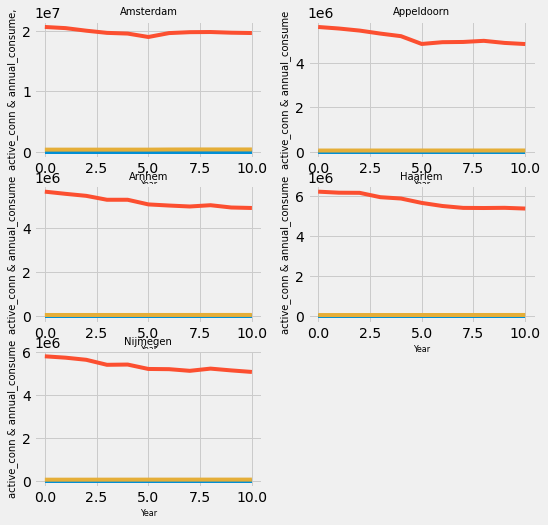

In [44]:
fig = plt.figure(figsize=(8, 8))

rows = 3
columns = 2
fig.add_subplot(rows, columns, 1)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume,",fontsize=10)
plt.title("Amsterdam",fontsize=10)
plt.plot(gas_ams)
fig.add_subplot(rows, columns, 2)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Appeldoorn",fontsize=10)
plt.plot(gas_app)
fig.add_subplot(rows, columns, 3)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Arnhem",fontsize=10)
plt.plot(gas_arn)
fig.add_subplot(rows, columns, 4)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Haarlem",fontsize=10)
plt.plot(gas_haa)
fig.add_subplot(rows, columns, 5)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Nijmegen",fontsize=10)
plt.plot(gas_nij)

In [45]:
# I can see gas consumption is slightly decreasing year by year.


In [46]:
# i ant to know what are the top 5 electricty comsumption cities?
# Also like to know is it same as gas consumption

In [47]:
topcities_Elec_consume= Elec.groupby(Elec['city']).agg({'annual_consume':'sum'}).annual_consume.nlargest(5)

In [48]:
topcities_Elec_consume

city
AMSTERDAM    601347105.0
ALMERE       200458052.0
ARNHEM       156861313.0
NIJMEGEN     153536720.0
HAARLEM      151434952.0
Name: annual_consume, dtype: float64

In [49]:
# electricity consumption amsterdam is 4times higher  than other cities.

In [50]:
df3=Elec[(Elec['city'] =='AMSTERDAM') | 
        (Elec['city']=='HAARLEM') | (Elec['city']=='NIJMEGEN') | 
        (Elec['city']== 'ARNHEM') | (Elec['city']=='ALMERE')]

In [51]:
Elec_consume = (pd.pivot_table(df3, values=['annual_consume', 'number_active_conn'], index=['city', 'Year'],
                    aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum}).rename_axis(None,axis=1).reset_index())

In [52]:
Elec_consume

,city,Year,annual_consume,number_active_conn
0,ALMERE,2010,18736494.0,80444.9999
1,ALMERE,2011,19009259.0,82318.0239
2,ALMERE,2012,19212245.0,83630.0639
3,ALMERE,2013,19238127.0,84756.9974
4,ALMERE,2014,18724981.0,83152.0377
5,ALMERE,2015,18136934.0,83925.0494
6,ALMERE,2016,17774172.0,84551.0521
7,ALMERE,2017,17562872.0,85641.0187
8,ALMERE,2018,17436187.0,87079.0215
9,ALMERE,2019,17221147.0,88922.0072


In [53]:
de1=Elec[(Elec['city'] =='AMSTERDAM')]
de2=Elec[(Elec['city'] =='ALMERE')]
de3=Elec[(Elec['city'] =='ARNHEM')]
de4=Elec[(Elec['city'] =='HAARLEM')]
de5=Elec[(Elec['city'] =='NIJMEGEN')]

In [54]:
Elec_ams =  pd.pivot_table(de1, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
Elec_alm =  pd.pivot_table(de2, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
Elec_arn =  pd.pivot_table(de3, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
Elec_haa =  pd.pivot_table(de4, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})
Elec_nij =  pd.pivot_table(de5, values=['annual_consume', 'number_active_conn'], index=['Year'],
                          aggfunc={'annual_consume': np.sum,'number_active_conn': np.sum})

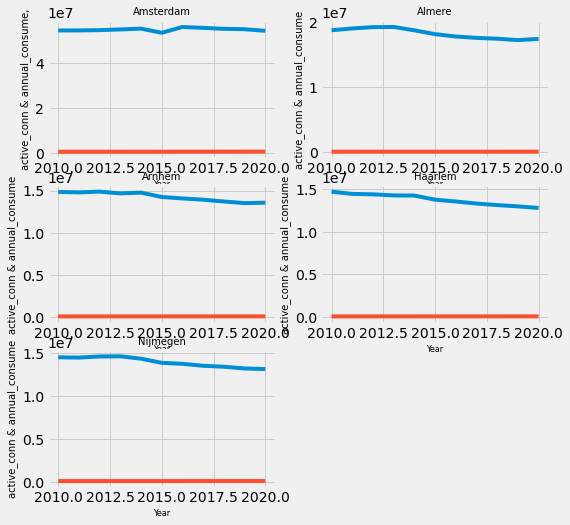

In [55]:
fig = plt.figure(figsize=(8, 8))

rows = 3
columns = 2
fig.add_subplot(rows, columns, 1)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume,",fontsize=10)
plt.title("Amsterdam",fontsize=10)
plt.plot(Elec_ams)
fig.add_subplot(rows, columns, 2)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Almere",fontsize=10)
plt.plot(Elec_alm)
fig.add_subplot(rows, columns, 3)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Arnhem",fontsize=10)
plt.plot(Elec_arn)
fig.add_subplot(rows, columns, 4)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Haarlem",fontsize=10)
plt.plot(Elec_haa)
fig.add_subplot(rows, columns, 5)
plt.xlabel("Year",fontsize=8)
plt.ylabel("active_conn & annual_consume",fontsize=10)
plt.title("Nijmegen",fontsize=10)
plt.plot(Elec_nij)

In [56]:
# electricity consumption decreases over the years.
# very interesting gas and electricity both are decreasing 
# what are th reason for decreases?If some kind of energy is going symulteneously?

In [57]:
#delivery_unit:  net consumption of electricity or gas. 
#The lower, the more energy was given back to the grid (for example if you have solar panels)

In [58]:
return_gas = (df2.pivot_table(index=['city','Year'], aggfunc={'delivery_unit':np.sum}).rename_axis(None,axis=1).reset_index())
return_elec = (df3.pivot_table(index=['city','Year'], aggfunc={'delivery_unit':np.sum}).rename_axis(None,axis=1).reset_index())

In [59]:
return_gas

,city,Year,delivery_unit
0,AMSTERDAM,2010,0.0
1,AMSTERDAM,2011,0.0
2,AMSTERDAM,2012,0.0
3,AMSTERDAM,2013,0.0
4,AMSTERDAM,2014,0.0
5,AMSTERDAM,2015,0.0
6,AMSTERDAM,2016,0.0
7,AMSTERDAM,2017,0.0
8,AMSTERDAM,2018,0.0
9,AMSTERDAM,2019,0.0


In [60]:
return_elec

,city,Year,delivery_unit
0,ALMERE,2010,4.575587e+04
1,ALMERE,2011,5.413041e+04
2,ALMERE,2012,7.108184e+04
3,ALMERE,2013,1.382867e+05
4,ALMERE,2014,5.089336e+05
5,ALMERE,2015,6.934571e+05
6,ALMERE,2016,9.176632e+05
7,ALMERE,2017,1.025410e+06
8,ALMERE,2018,1.517441e+06
9,ALMERE,2019,1.759435e+06


In [61]:
rg=pd.DataFrame(return_gas)
gc=pd.DataFrame(gas_consume)
re=pd.DataFrame(return_elec)
ec=pd.DataFrame(Elec_consume)

In [62]:
data = pd.merge(left =gc , #this is a table
                                right = rg, #this is a table
                                how = 'right',  #how do we merge
                                left_on = ["city","Year"], 
                                right_on= ["city","Year"])
dat = pd.merge(left =ec , #this is a table
                                right = re, #this is a table
                                how = 'right',  #how do we merge
                                left_on = ["city","Year"], 
                                right_on= ["city","Year"])

In [63]:
energy = pd.merge(left =data , #this is a table
                                right = dat, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["city","Year"], 
                                right_on= ["city","Year"])

In [64]:
energy['solar_energy']=energy['delivery_unit_y']

In [65]:
energy.columns=(['city', 'Year', 'annual_consume_gas', 'number_active_conn_gas',
       'delivery_unit_gas', 'annual_consume_elec', 'number_active_conn_elec',
       'delivery_unit_elec', 'solar_energy'])

In [66]:
energy= energy.drop(['delivery_unit_gas'],axis=1)

In [67]:
# if i merge gas and elctricity consumption of top 5 cities ,city almere is not in gas data so it will not be ther anymore in the data.

In [68]:
se1=energy[energy['city']=='AMSTERDAM']
se2=energy[energy['city']=='ARNHEM']
se3=energy[energy['city']=='HAARLEM']
se4=energy[energy['city']=='NIJMEGEN']

In [69]:
se1

,city,Year,annual_consume_gas,number_active_conn_gas,annual_consume_elec,number_active_conn_elec,delivery_unit_elec,solar_energy
0,AMSTERDAM,2010,20703727.0,348196.9785,54290067.0,408548.2897,2.683427e+04,2.683427e+04
1,AMSTERDAM,2011,20513470.0,348568.0017,54305845.0,411318.2837,4.415083e+04,4.415083e+04
2,AMSTERDAM,2012,20086633.0,349248.0549,54422131.0,413864.3313,7.248562e+04,7.248562e+04
3,AMSTERDAM,2013,19726875.0,349580.1518,54733755.0,416334.4547,1.279830e+05,1.279830e+05
4,AMSTERDAM,2014,19608792.0,349757.1575,55092954.0,414200.2871,3.519633e+05,3.519633e+05
5,AMSTERDAM,2015,19042749.0,350515.0908,53253124.0,416237.0972,4.421304e+05,4.421304e+05
6,AMSTERDAM,2016,19689961.0,371268.1087,55832552.0,442905.2789,5.752930e+05,5.752930e+05
7,AMSTERDAM,2017,19840825.0,378433.1432,55438717.0,448351.1812,6.869032e+05,6.869032e+05
8,AMSTERDAM,2018,19866854.0,379546.0165,55010230.0,454117.3789,8.580706e+05,8.580706e+05
9,AMSTERDAM,2019,19753536.0,379297.1596,54836591.0,459621.4392,1.064675e+06,1.064675e+06


In [70]:
se2['solar_energy'].sum()

4324513.046299998

<AxesSubplot:xlabel='Year', ylabel='solar_energy'>

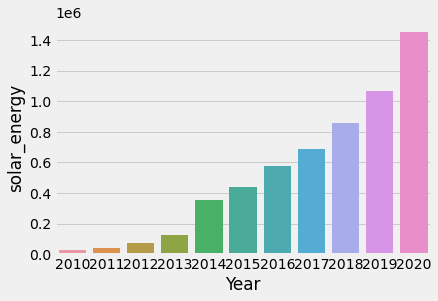

In [71]:
sns.barplot(x='Year', y='solar_energy', data=se1)

<AxesSubplot:xlabel='Year', ylabel='solar_energy'>

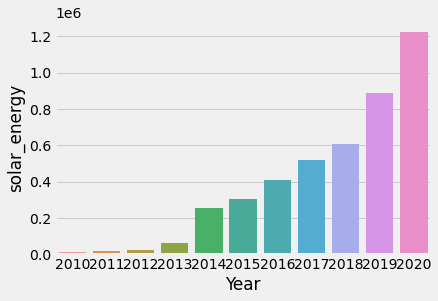

In [72]:
sns.barplot(x='Year', y='solar_energy', data=se2)

<AxesSubplot:xlabel='Year', ylabel='solar_energy'>

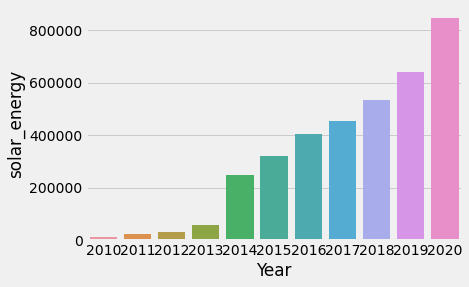

In [73]:
sns.barplot(x='Year', y='solar_energy', data=se3)

<AxesSubplot:xlabel='Year', ylabel='solar_energy'>

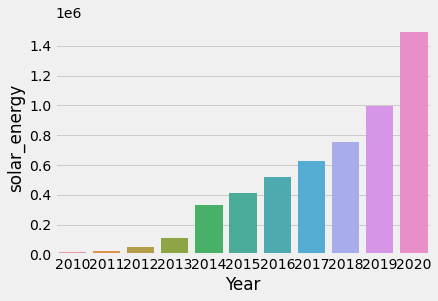

In [74]:
sns.barplot(x='Year', y='solar_energy', data=se4)

In [75]:
# findings: slight decrease of gas
#decreas of  electricity 
# increases solar energy year by year

In [76]:
# I want to know, Are top 5gas consumption   cities in same cluster or not?

In [111]:
df2['Year']=df2['Year'].astype('object')

In [112]:
num=df2.select_dtypes(include = np.number)
cat=df2.select_dtypes(exclude = np.number)

In [113]:
cat=cat.reindex(['zipcode_from', 'zipcode_to','street','city','type_of_connection','Year'], axis=1)

In [114]:
cat=cat.drop(['zipcode_from','street'],axis=1)

In [115]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat) #drop=first, drops one of the values so we don't have redundant
cat_encoded = encoder.transform(cat).toarray()
cat_encoded = encoder.transform(cat).toarray()

In [116]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit(cat['city']).transform(cat['city']) # ordered wrt value counts
label_encoded1 = pd.DataFrame(label_encoded, columns=['city'])
label_encoded = LabelEncoder().fit(cat['Year']).transform(cat['Year']) # ordered wrt value counts
label_encoded2 = pd.DataFrame(label_encoded, columns=['Year'])
print(label_encoded1)
label_encoded1.value_counts()
print(label_encoded2)
label_encoded2.value_counts()

        city
0          0
1          0
2          0
3          0
4          0
...      ...
301898     1
301899     1
301900     1
301901     1
301902     1

[301903 rows x 1 columns]
        Year
0          0
1          0
2          0
3          0
4          0
...      ...
301898    10
301899    10
301900    10
301901    10
301902    10

[301903 rows x 1 columns]


Year
10      28317
9       28287
8       28224
7       28165
6       27878
5       26987
4       26935
3       26867
2       26805
1       26755
0       26683
dtype: int64

In [117]:
a=pd.DataFrame(label_encoded1).reset_index(drop=True)
b=pd.DataFrame(label_encoded2).reset_index(drop=True)
c=pd.DataFrame(num['annual_consume']).reset_index(drop=True)

In [118]:
d=pd.concat([a,b,c],axis=1,ignore_index=True)

In [119]:
from sklearn import cluster
import numpy as np

In [120]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(d)
    pred = kmeans.predict(d)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

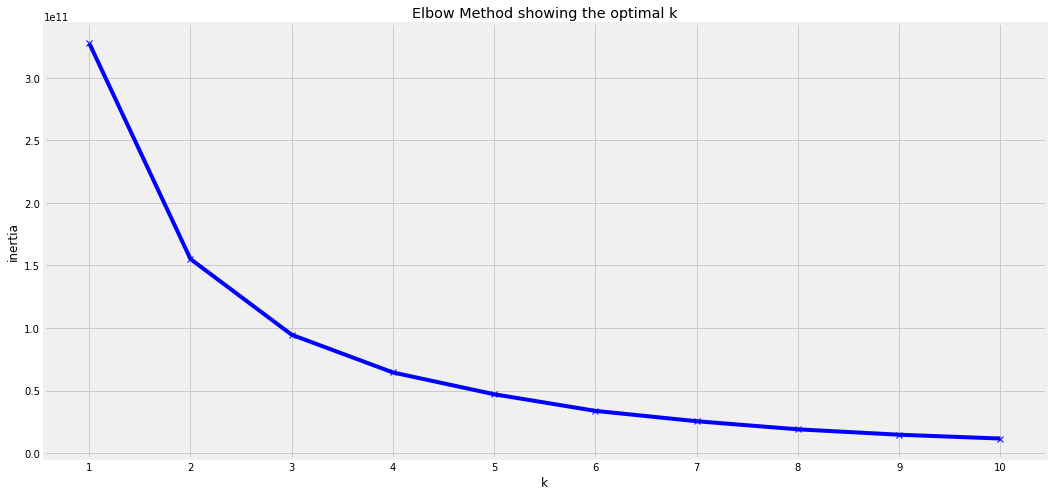

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [122]:
inertia = []
kmeans = cluster.KMeans(n_clusters=2,random_state=1234)
kmeans.fit(d)
pred = kmeans.predict(d)
inertia.append(kmeans.inertia_)

In [123]:
d['cluster']=pred

In [124]:
d.cluster.value_counts()

0    276966
1     24937
Name: cluster, dtype: int64

In [77]:
# out of 5 cities ,i can say most of the gas consumption from cluster zero.

# Choose a model for forecasting

In [78]:
# Use time-series modeling for forecasting

In [79]:
import statsmodels.api as sm

In [80]:
gas_ams['annual_consume_per_connection']=(gas_ams['annual_consume']/gas_ams['number_active_conn'])

In [81]:
gas_ams

,Year,annual_consume,number_active_conn,annual_consume_per_connection
0,2010,20703727.0,348196.9785,59.459812
1,2011,20513470.0,348568.0017,58.850697
2,2012,20086633.0,349248.0549,57.513944
3,2013,19726875.0,349580.1518,56.430192
4,2014,19608792.0,349757.1575,56.064019
5,2015,19042749.0,350515.0908,54.327901
6,2016,19689961.0,371268.1087,53.034345
7,2017,19840825.0,378433.1432,52.428878
8,2018,19866854.0,379546.0165,52.343729
9,2019,19753536.0,379297.1596,52.079314


In [82]:
gas_ams['Year']

0     2010
1     2011
2     2012
3     2013
4     2014
5     2015
6     2016
7     2017
8     2018
9     2019
10    2020
Name: Year, dtype: int64

In [83]:
gas_ams=gas_ams.drop(['annual_consume','number_active_conn'],axis=1)

In [89]:
gas_ams

,Year,annual_consume_per_connection
0,2010,59.459812
1,2011,58.850697
2,2012,57.513944
3,2013,56.430192
4,2014,56.064019
5,2015,54.327901
6,2016,53.034345
7,2017,52.428878
8,2018,52.343729
9,2019,52.079314


In [91]:
gas_ams['Year'] = pd.to_datetime(gas_ams['Year'],format='%Y')
gas_ams.index = pd.DatetimeIndex(gas_ams['Year'])

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [87]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
y = gas_ams['annual_consume_per_connection'].resample('M').mean()
y = y.fillna(y.bfill())

In [95]:
y

Year
2010-01-31    59.459812
2010-02-28    58.850697
2010-03-31    58.850697
2010-04-30    58.850697
2010-05-31    58.850697
                ...    
2019-09-30    51.905297
2019-10-31    51.905297
2019-11-30    51.905297
2019-12-31    51.905297
2020-01-31    51.905297
Freq: M, Name: annual_consume_per_connection, Length: 121, dtype: float64

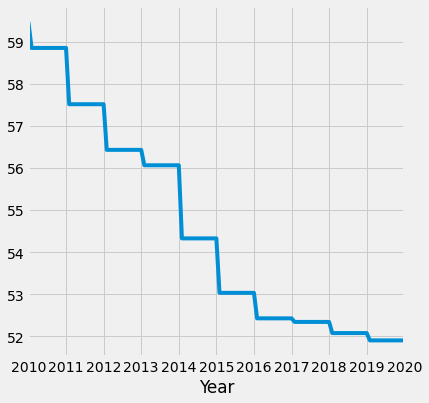

In [97]:
y.plot(figsize=(6, 6))
plt.show()

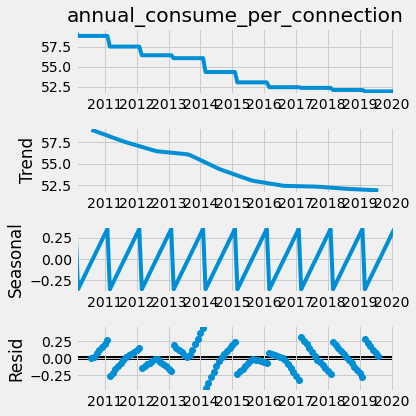

In [98]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [100]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [103]:
y['2017':]

Year
2017-01-31    52.428878
2017-02-28    52.343729
2017-03-31    52.343729
2017-04-30    52.343729
2017-05-31    52.343729
2017-06-30    52.343729
2017-07-31    52.343729
2017-08-31    52.343729
2017-09-30    52.343729
2017-10-31    52.343729
2017-11-30    52.343729
2017-12-31    52.343729
2018-01-31    52.343729
2018-02-28    52.079314
2018-03-31    52.079314
2018-04-30    52.079314
2018-05-31    52.079314
2018-06-30    52.079314
2018-07-31    52.079314
2018-08-31    52.079314
2018-09-30    52.079314
2018-10-31    52.079314
2018-11-30    52.079314
2018-12-31    52.079314
2019-01-31    52.079314
2019-02-28    51.905297
2019-03-31    51.905297
2019-04-30    51.905297
2019-05-31    51.905297
2019-06-30    51.905297
2019-07-31    51.905297
2019-08-31    51.905297
2019-09-30    51.905297
2019-10-31    51.905297
2019-11-30    51.905297
2019-12-31    51.905297
2020-01-31    51.905297
Freq: M, Name: annual_consume_per_connection, dtype: float64

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1302.3375507702895
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1173.2283783316207
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:299.184346124143
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:197.6801657724006
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:180.19086888688338
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:170.4842070407438
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:172.4364946236244
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:148.76848825358175
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1134.543510958422
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1024.5599994965314
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:173.52977075199874
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:109.60701970798284
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:79.25991044149572
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:74.90797608488863
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:95.84379553644101
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:67.81251485946547
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:22.20715122615822
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-54.41190051580505
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:-62.

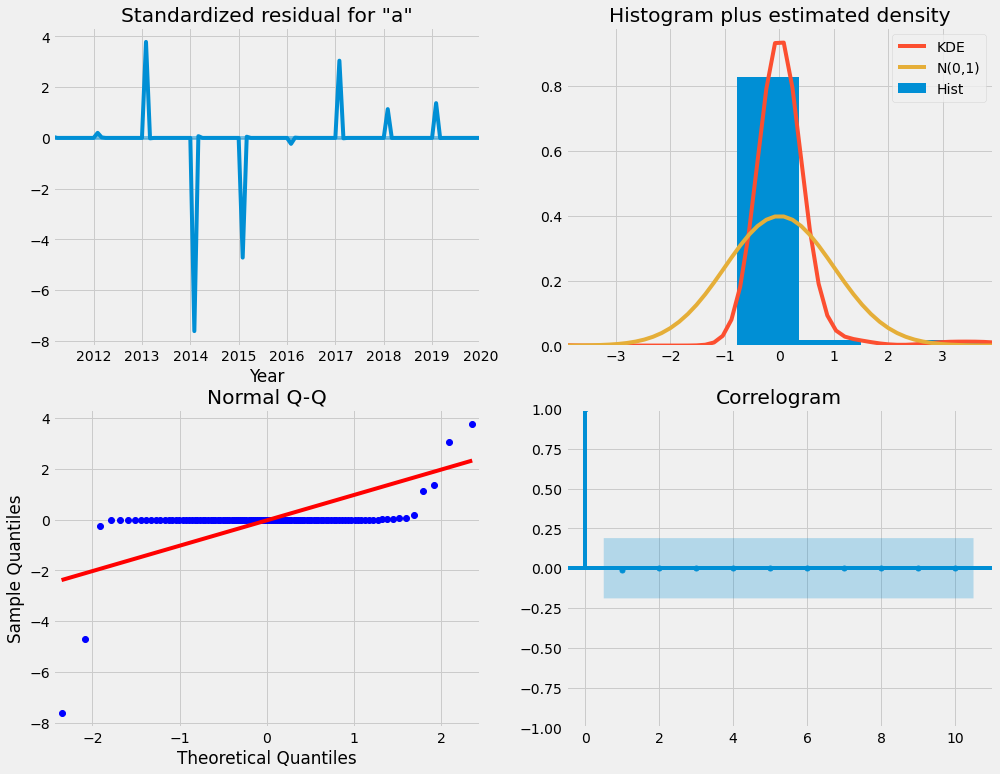

In [101]:
import warnings 

warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)  # DataFrame append
            del temp

        except:
            continue


m = np.amin(AIC_list['AIC'].values) # Find minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find index number for lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]



mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

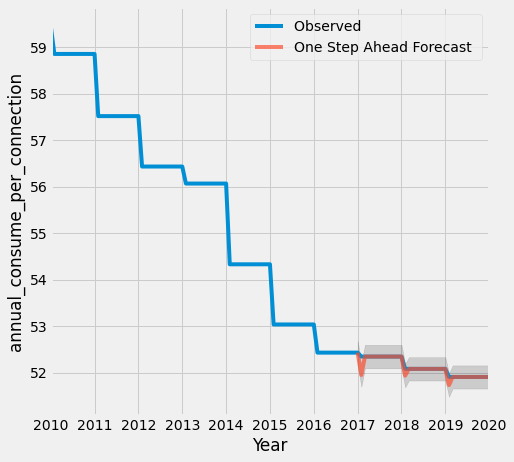

In [104]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2000':].plot(label = 'Observed ')
pred.predicted_mean.plot(ax=ax, label='One Step Ahead Forecast ', alpha=.7, figsize=(7, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha= 0.15)

ax.set_xlabel('Year')
ax.set_ylabel('annual_consume_per_connection')
plt.legend()

plt.show()

In [105]:
y_forecasted = pred.predicted_mean
y_actual = y['2017-01-31':]
mse = ((y_forecasted - y_actual) ** 2).mean()
print('The MSE of the forecasts is {}'.format(round(mse, 2)))
print('The RMSE of the forecasts is {}'.format(round(np.sqrt(mse), 2)))

The MSE of the forecasts is 0.01
The RMSE of the forecasts is 0.08


In [106]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

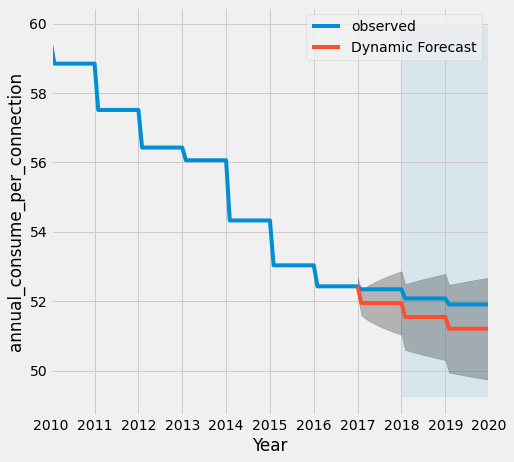

In [107]:
ax = y['2000':].plot(label='observed', figsize=(7,7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Year')
ax.set_ylabel('annual_consume_per_connection')

plt.legend()
plt.show()

In [108]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The MSE of the forecasts is {}'.format(round(mse, 2)))

The MSE of the forecasts is 0.3


In [109]:
# Get forecast 500 steps ahead in future

pred_uc = results.get_forecast(steps= 100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

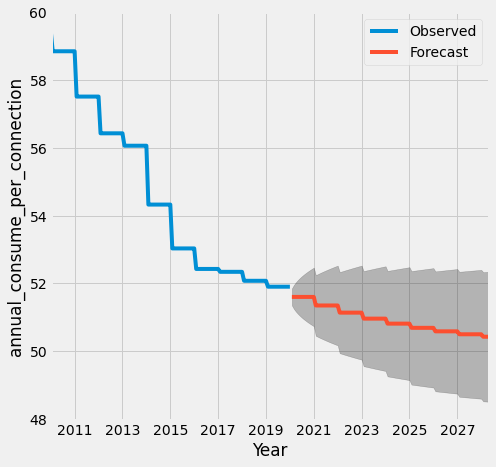

In [110]:
ax = y['2000':].plot(label='Observed', figsize=(7,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Year')
ax.set_ylabel('annual_consume_per_connection')

plt.legend()
plt.show()